In [67]:
# Instalando o TensorFlow
!pip install -q tensorflow-gpu==2.10.0

In [68]:
# Importando bibliotecas
from tensorflow.keras import datasets, layers, models, callbacks
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import io
import os

In [69]:
# Verificando a versão do TensorFlow
print("Versão do TensorFlow:", tf.__version__)

Versão do TensorFlow: 2.10.0


In [70]:
# Carregando o dataset MNIST
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

In [71]:
# Pré-processando dos dados
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255.0
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255.0

In [72]:
# Classes do modelo
classes=[0,1,2,3,4,5,6,7,8,9]

In [73]:
# Construindo o modelo
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [74]:
# Compilando o modlelo
model.compile(optimizer='adam',
                         loss='sparse_categorical_crossentropy',
                         metrics=['accuracy'])

In [75]:
# Treinando o modelo
model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 52s 27ms/step - loss: 0.1495 - accuracy: 0.9548 - val_loss: 0.0526 - val_accuracy: 0.9831
Epoch 2/5
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0474 - accuracy: 0.9850 - val_loss: 0.0395 - val_accuracy: 0.9874
Epoch 3/5
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0338 - accuracy: 0.9891 - val_loss: 0.0311 - val_accuracy: 0.9907
Epoch 4/5
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0264 - accuracy: 0.9913 - val_loss: 0.0273 - val_accuracy: 0.9914
Epoch 5/5
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0205 - accuracy: 0.9935 - val_loss: 0.0282 - val_accuracy: 0.9918


In [76]:
# Gerando as previsões das classes
y_pred = np.argmax(model.predict(test_images), axis=-1)

313/313 [==============================] - 2s 6ms/step


In [77]:
# Gerando a matriz de confusão
con_mat = tf.math.confusion_matrix(labels=test_labels, predictions=y_pred).numpy()
print(con_mat)

[[ 978    1    0    0    0    0    0    1    0    0]
 [   0 1135    0    0    0    0    0    0    0    0]
 [   1    3 1023    0    1    0    0    4    0    0]
 [   0    1    2 1004    0    2    0    0    1    0]
 [   0    0    0    0  970    0    2    0    1    9]
 [   2    0    0    4    0  882    2    0    1    1]
 [   4    5    2    0    0    2  943    0    2    0]
 [   0    4    2    0    0    0    0 1019    1    2]
 [   4    0    0    0    1    0    0    0  968    1]
 [   0    1    0    0    2    3    1    4    2  996]]


In [78]:
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm, index=classes, columns=classes)

print(con_mat_df)

     0     1     2     3     4     5     6     7     8     9
0  1.0  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00
1  0.0  1.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00
2  0.0  0.00  0.99  0.00  0.00  0.00  0.00  0.00  0.00  0.00
3  0.0  0.00  0.00  0.99  0.00  0.00  0.00  0.00  0.00  0.00
4  0.0  0.00  0.00  0.00  0.99  0.00  0.00  0.00  0.00  0.01
5  0.0  0.00  0.00  0.00  0.00  0.99  0.00  0.00  0.00  0.00
6  0.0  0.01  0.00  0.00  0.00  0.00  0.98  0.00  0.00  0.00
7  0.0  0.00  0.00  0.00  0.00  0.00  0.00  0.99  0.00  0.00
8  0.0  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.99  0.00
9  0.0  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.99


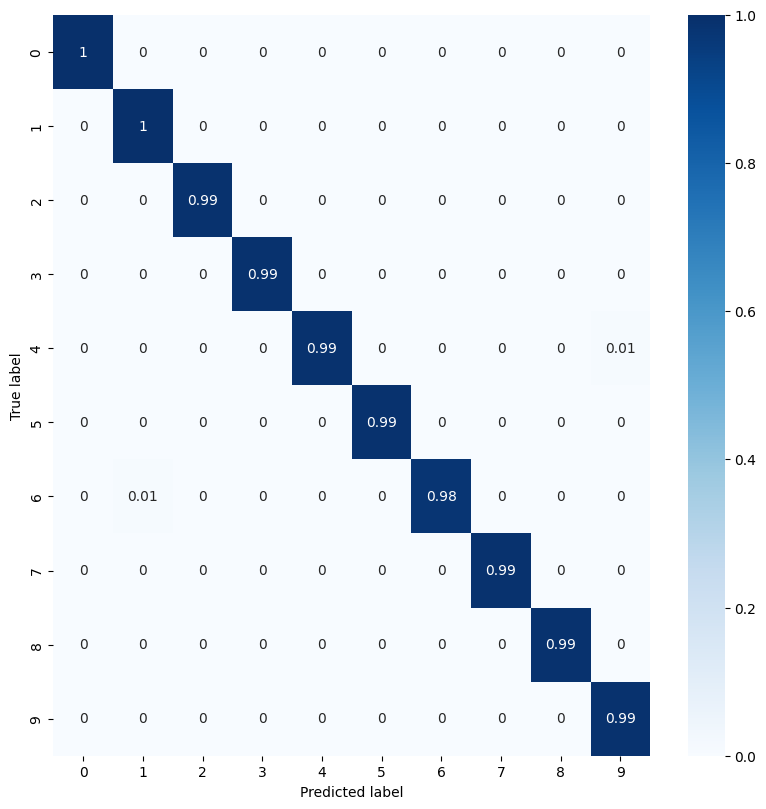

In [79]:
# Visualizando a matriz de confusão
plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True, cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [80]:
import numpy as np

class ClassificationMetrics:
    def __init__(self, confusion_matrix):
        """
        Inicializa a classe com a matriz de confusão.
        :param confusion_matrix: Matriz de confusão (numpy array)
        """
        self.confusion_matrix = confusion_matrix
        self.VP = np.diag(confusion_matrix)  # Verdadeiros positivos
        self.FP = confusion_matrix.sum(axis=0) - self.VP  # Falsos positivos
        self.FN = confusion_matrix.sum(axis=1) - self.VP  # Falsos negativos
        self.VN = confusion_matrix.sum() - (self.VP + self.FP + self.FN)  # Verdadeiros negativos

    def sensitivity(self):
        """
        Calcula a sensibilidade (recall) para cada classe.
        :return: Sensibilidade por classe (array)
        """
        return np.round(self.VP / (self.VP + self.FN), decimals=2)

    def specificity(self):
        """
        Calcula a especificidade para cada classe.
        :return: Especificidade por classe (array)
        """
        return np.round(self.VN / (self.VN + self.FP), decimals=2)

    def accuracy(self):
        """
        Calcula a acurácia geral.
        :return: Acurácia (float)
        """
        total_correct = self.VP.sum()
        total_elements = self.confusion_matrix.sum()
        return np.round(total_correct / total_elements, decimals=2)

    def precision(self):
        """
        Calcula a precisão para cada classe.
        :return: Precisão por classe (array)
        """
        return np.round(self.VP / (self.VP + self.FP), decimals=2)

    def f_score(self):
        """
        Calcula o F-score para cada classe.
        :return: F-score por classe (array)
        """
        precision = self.precision()
        sensitivity = self.sensitivity()
        return np.round(2 * (precision * sensitivity) / (precision + sensitivity), decimals=2)

    def report(self):
        """
        Gera um relatório com todas as métricas.
        :return: Dicionário contendo as métricas por classe
        """
        return {
            "Sensitivity": self.sensitivity(),
            "Specificity": self.specificity(),
            "Accuracy": self.accuracy(),
            "Precision": self.precision(),
            "F-Score": self.f_score(),
        }

In [81]:
# Criando a  instância da classe ClassificationMetrics
metrics = ClassificationMetrics(con_mat)

In [82]:
# Obtendo as métricas
report = metrics.report()

In [83]:
# Exibindo relatório das métricas
print("Relatório de Métricas:")
for metric, values in report.items():
    if isinstance(values, np.ndarray):
        print(f"{metric}: {values.tolist()}")
    else:
        print(f"{metric}: {values}")

Relatório de Métricas:
Sensitivity: [1.0, 1.0, 0.99, 0.99, 0.99, 0.99, 0.98, 0.99, 0.99, 0.99]
Specificity: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Accuracy: 0.99
Precision: [0.99, 0.99, 0.99, 1.0, 1.0, 0.99, 0.99, 0.99, 0.99, 0.99]
F-Score: [0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.98, 0.99, 0.99, 0.99]


In [84]:
# Callback para TensorBoard
logdir = 'logs/images'

os.makedirs(logdir, exist_ok=True)

file_writer = tf.summary.create_file_writer(logdir)

In [85]:
def log_confusion_matrix(epoch, logs):
    test_pred = np.argmax(model.predict(test_images), axis=-1)

    con_mat = tf.math.confusion_matrix(labels=test_labels, predictions=test_pred).numpy()
    con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

    con_mat_df = pd.DataFrame(con_mat_norm, index=classes, columns=classes)

    figure = plt.figure(figsize=(8, 8))
    sns.heatmap(con_mat_df, annot=True, cmap=plt.cm.Blues)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    plt.close(figure)
    buf.seek(0)
    image = tf.image.decode_png(buf.getvalue(), channels=4)
    image = tf.expand_dims(image, 0)

    with file_writer.as_default():
        tf.summary.image("Confusion Matrix", image, step=epoch)

In [86]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
cm_callback = callbacks.LambdaCallback(on_epoch_end=log_confusion_matrix)

In [ ]:
# Treinando modelo com callback
model.fit(train_images, train_labels, epochs=5, verbose=0,
          validation_data=(test_images, test_labels),
          callbacks=[tensorboard_callback, cm_callback])

313/313 [==============================] - 2s 6ms/step


In [ ]:
# Para iniciar o TensorBoard, execute o comando abaixo no terminal:
%tensorboard --logdir logs/images